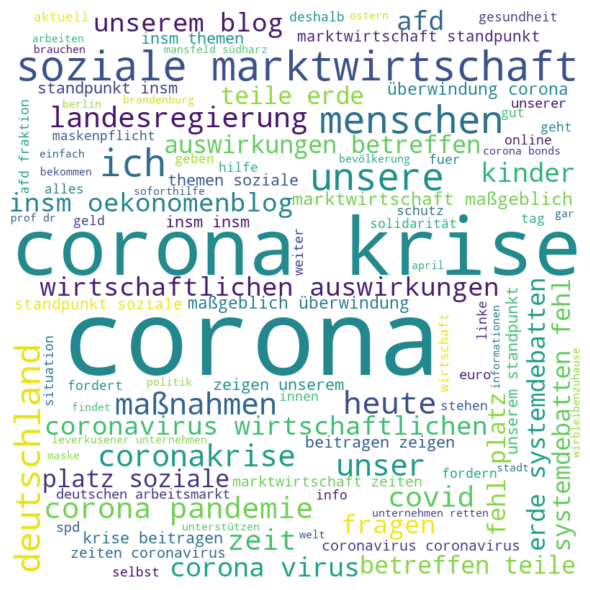

In [17]:
import sys
!{sys.executable} -m pip install wordcloud
import sys
!{sys.executable} -m pip install pandas
import sys
!{sys.executable} -m pip install matplotlib


# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df = pd.read_csv("germany_posts.csv", encoding ="utf-8", delimiter=";", error_bad_lines=False) 
stop = pd.read_csv("exclude.txt")
  
comment_words = '' 
stopwords = set(stop) 
  
# iterate through the csv file 

df['Date'] = pd.to_datetime(df['ad_delivery_start_time'])
df = df.set_index(df['Date'])
df = df.sort_index()
df.head()
data=df['2020-04-01':'2020-04-30']

for val in data.ad_creative_body: 
   
        # typecaste each val to string 
        val = str(val) 
        if "corona" in val:

            # split the value 
            tokens = val.split() 

            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 

            comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10, max_words=100, collocations=True).generate_from_text(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0) 

wordcloud.to_file("germany_word_cloud_bigrams_April.png")  
plt.show() 